In [19]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [6]:
msft = yf.Ticker("MSFT")

# get stock info
msft.info

# get historical market data
hist = msft.history(period="max")

In [7]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.056001,0.064236,0.056001,0.061491,1031788800,0.0,0.0
1986-03-14,0.061491,0.064785,0.061491,0.063687,308160000,0.0,0.0
1986-03-17,0.063687,0.065334,0.063687,0.064785,133171200,0.0,0.0
1986-03-18,0.064785,0.065334,0.062589,0.063138,67766400,0.0,0.0
1986-03-19,0.063138,0.063687,0.061491,0.062040,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2021-10-12,295.339996,295.440002,292.350006,292.880005,17974100,0.0,0.0
2021-10-13,294.910004,297.279999,293.489990,296.309998,23416300,0.0,0.0
2021-10-14,299.209991,303.269989,297.829987,302.750000,27262900,0.0,0.0


In [8]:
#Calculate the max and min close price
maximum_price = hist['Close'].max()
minimum_price = hist['Close'].min()
difference = maximum_price - minimum_price #Get the difference        
first_level = maximum_price - difference * 0.236   
second_level = maximum_price - difference * 0.382  
third_level = maximum_price - difference * 0.5     
fourth_level = maximum_price - difference * 0.618  

In [14]:
maximum_price = 0
minimum_price = 1000
differences = []
firsts = []
seconds = []
thirds = []
fourths = []

for price in hist['Close']:
    if price > maximum_price: 
        maximum_price = price
    elif price < minimum_price: 
        minimum_price = price

    differences.append(maximum_price - minimum_price)       
    firsts.append(maximum_price - difference * 0.236)   
    seconds.append(maximum_price - difference * 0.382)  
    thirds.append(maximum_price - difference * 0.5)     
    fourths.append(maximum_price - difference * 0.618)

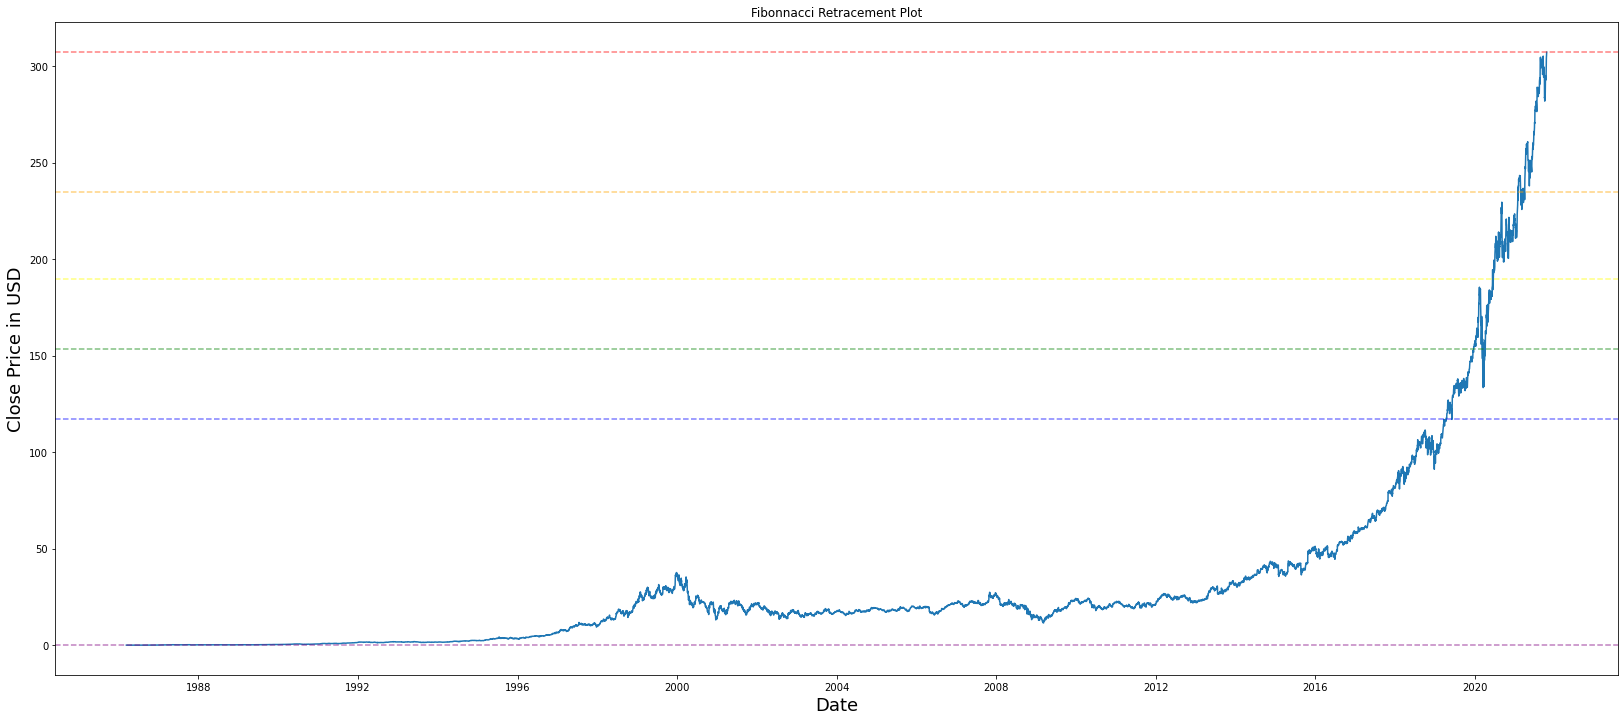

In [21]:
plt.figure(figsize=(28,12))
plt.title('Fibonnacci Retracement Plot')
plt.plot(hist.index, hist['Close'])
plt.axhline(maximum_price, linestyle='--', alpha=0.5, color = 'red')
plt.axhline(first_level, linestyle='--', alpha=0.5, color = 'orange')
plt.axhline(second_level, linestyle='--', alpha=0.5, color = 'yellow')
plt.axhline(third_level, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(fourth_level, linestyle='--', alpha=0.5, color = 'blue')
plt.axhline(minimum_price, linestyle='--', alpha=0.5, color = 'purple')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price in USD',fontsize=18)
plt.show()